<a href="https://colab.research.google.com/github/jahnavi1473/pythonprojects/blob/main/Loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **LOAN APPROVAL PREDICTION**

STEP 1: IMPORTING THE NECCESARY LIBRARIES

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

STEP 2: LOADING THE DATASET

In [2]:
df = pd.read_csv('loan_prediction.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [3]:
#drop the loan id column
df = df.drop('Loan_ID', axis=1)

In [4]:
df.shape

(614, 12)

This dataset has 614 rows and 12 columns

STEP 3:HANDLING MISSING VALUES

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Married, Dependents , Self_eployed, LoanAmount, Loan_Amount_Term and Credit_History have null values and they need to be handled.

In [6]:
#statistical description of the dataset
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [7]:
# Handling missing values in categorical columns:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [8]:
# Handling missing values in numerical columns:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
# Fill missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

STEP 4:EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Education', ylabel='count'>

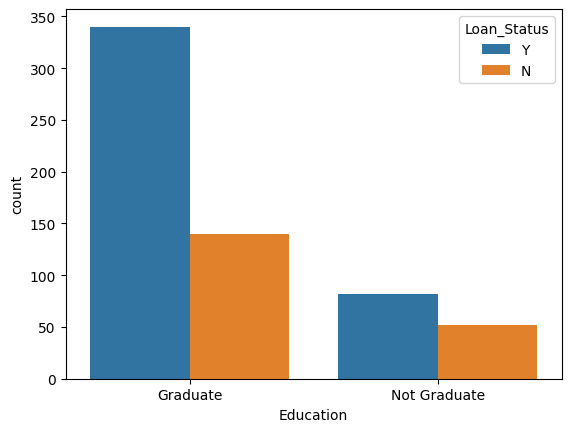

In [9]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

more approval when person graduated

<Axes: xlabel='Married', ylabel='count'>

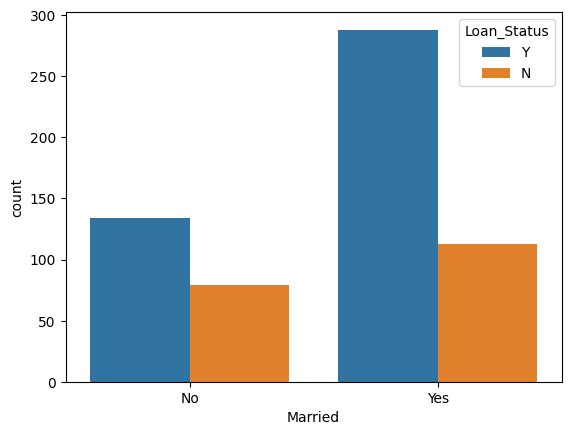

In [10]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

more approval when person married

<Axes: xlabel='Gender', ylabel='count'>

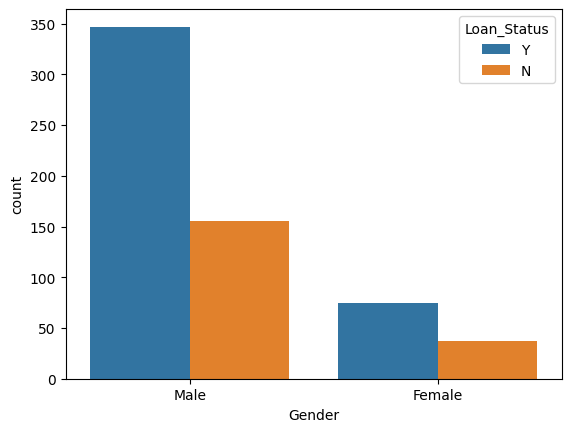

In [11]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

[]

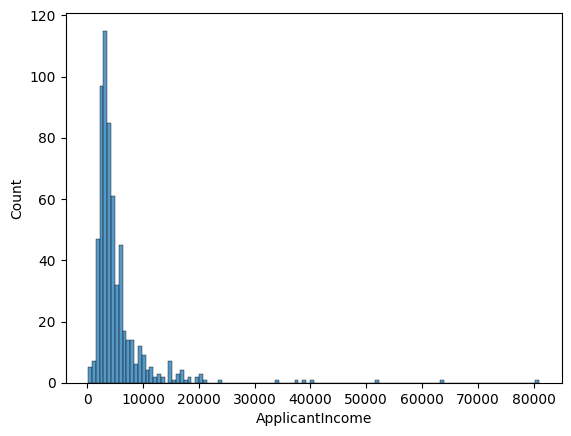

In [12]:
fig_applicant_income = sns.histplot(data= df, x='ApplicantIncome')
fig_applicant_income.plot()

STEP 5:LABEL ENCODING (convert categorical columns to numerical values)

In [13]:
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [15]:
df["Dependents"].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [16]:
df.replace({'Dependents':{'3+':3}},inplace=True)

In [17]:
df["Dependents"].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [18]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


STEP 6:DATASET SPLITTING INTO TRAIN AND TEST DATA

In [20]:
# separating the data and label
X = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

STEP 7:STANDARDIZING THE DATA

In [22]:
# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

STEP 8: MODEL TRAINING AND EVALUATION

In [26]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [27]:
X_train_prediction = model.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8289205702647657


In [28]:
X_test_prediction = model.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7804878048780488
